In [1]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import re
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfTransformer
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
import matplotlib.pyplot as plt
import itertools

In [2]:
#Reading the data from directory
data = pd.read_csv('data/AmharicNewsData.csv',encoding='utf-8')
data=shuffle(data)
data.head()

,headline,category,date,views,article,link,Source
27662,የኢትዮጵያ እግር ኳስ ፌዴሬሽን ሥራ አስፈፃሚ ኮሚቴ አስቸኳይ ስብስባ አደ...,ስፖርት,18/06/2020,NaN,የኢትዮጵያ እግር ኳስ ፌዴሬሽን ስራ አስፈጻሚ ኮሚቴ አባላት ዛሬ ሰኔ 10...,https://Soccer Ethiopia.net/football/58474,Soccer Ethiopia
34492,የኢትዮጵያ ከፍተኛ ሊግ ተስተካካይ ጨዋታ የሚደረግባቸው ቀናት ይፋ ተደርገ...,ስፖርት,18/04/2016,NaN,ጅማ አባ ቡና ፣ ሙገር ሲሚንቶ እና አአ ከተማ ለኢትዮጵያ ከ20 አመት በ...,https://Soccer Ethiopia.net/football/9150,Soccer Ethiopia
25840,በዝናብ እጥረት የምግብ ዋስትና ችግር ለገጠማቸው በውስን ጨረታ ስንዴ እን...,ሀገር አቀፍ ዜና,23/08/2015,NaN,በዝናብ እጥረት ምክንያት የምግብ ዋስትና ችግር ለገጠማቸው ወገኖች በውስን...,https://www.ethiopianreporter.com/article/8463,Reporter
14354,ለመከላከያ ሠራዊት እየተደረገ ያለውን ድጋፍ ለማስተናገድ የፌዴራል ተቋማት...,ሀገር አቀፍ ዜና,11/11/2020,551.0,አዲስ አበባ ፣ ህዳር 2 ፣ 2013 (ኤፍ ቢ ሲ) ለመከላከያ ሠራዊት እየ...,https://www.fanabc.com/%e1%88%88%e1%88%98%e1%8...,FBC
28442,ሪፖርት | ወልዋሎ እና ኢትዮጵያ ቡና ነጥብ ተጋርተዋል ዜና - ሶከር ኢት...,ስፖርት,26/01/2020,NaN,በ10ኛ ሳምንት የኢትዮጵያ ፕሪምየር ሊግ መቐለ ላይ ወልዋሎ እና ኢትዮጵያ...,https://Soccer Ethiopia.net/football/54855,Soccer Ethiopia


In [3]:
#displays number of content data
data.shape

(51372, 7)

In [4]:
data.category.value_counts()

ሀገር አቀፍ ዜና    20666
ስፖርት          10309
ፖለቲካ           9325
ዓለም አቀፍ ዜና     6543
ቢዝነስ           3894
መዝናኛ            635
Name: category, dtype: int64

In [5]:
#prints information about the DataFrame. 
#The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51372 entries, 27662 to 44317
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   headline  47809 non-null  object 
 1   category  51372 non-null  object 
 2   date      47821 non-null  object 
 3   views     18532 non-null  float64
 4   article   51343 non-null  object 
 5   link      51372 non-null  object 
 6   Source    51372 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.1+ MB


# Data cleaning and preparation

In [6]:
#Removing the unwated column for our purpose (we won't use it for the analysis)
data.drop(['date', 'views', 'headline','link', 'Source'],axis=1,inplace=True)
#data.head()

In [7]:
data.isnull().any()

category    False
article      True
dtype: bool

In [8]:
# When you call this method dropna(),it will look for rows with missing values. 
#If it finds a row with a missing value, it will drop the entire row.
data = data.dropna(subset=['article'])

In [9]:
#checking the null value of article classes
data.article.isnull().sum()

0

In [10]:
#counts the number of articles including in source category after droping null value
data.category.value_counts()

ሀገር አቀፍ ዜና    20665
ስፖርት          10308
ፖለቲካ           9310
ዓለም አቀፍ ዜና     6538
ቢዝነስ           3887
መዝናኛ            635
Name: category, dtype: int64

In [11]:
#Displays distinct values from source column
data.category.unique()

array(['ስፖርት', 'ሀገር አቀፍ ዜና', 'ፖለቲካ', 'ቢዝነስ', 'ዓለም አቀፍ ዜና', 'መዝናኛ'],
      dtype=object)

In [12]:
#Here you can show that news category’s name with respect to the following unique category ID.
data['category_ID'] = data['category'].factorize()[0]
data.head()

,category,article,category_ID
27662,ስፖርት,የኢትዮጵያ እግር ኳስ ፌዴሬሽን ስራ አስፈጻሚ ኮሚቴ አባላት ዛሬ ሰኔ 10...,0
34492,ስፖርት,ጅማ አባ ቡና ፣ ሙገር ሲሚንቶ እና አአ ከተማ ለኢትዮጵያ ከ20 አመት በ...,0
25840,ሀገር አቀፍ ዜና,በዝናብ እጥረት ምክንያት የምግብ ዋስትና ችግር ለገጠማቸው ወገኖች በውስን...,1
14354,ሀገር አቀፍ ዜና,አዲስ አበባ ፣ ህዳር 2 ፣ 2013 (ኤፍ ቢ ሲ) ለመከላከያ ሠራዊት እየ...,1
28442,ስፖርት,በ10ኛ ሳምንት የኢትዮጵያ ፕሪምየር ሊግ መቐለ ላይ ወልዋሎ እና ኢትዮጵያ...,0


#### The shows the news article count for source from our dataset.
data.groupby('category').category_ID.value_counts().plot(kind = "bar")
#plt.rc('font', family='Lohit Devanagari')
#data.encode('utf8')
plt.xlabel("Source category of data")
plt.rc('font', family='Lohit Devanagari')
plt.ylabel("Count")
plt.title("Visulaize numbers of Source of data")
plt.show()

In [14]:
#Display the word length of text exist in article column and put in word_len column
data['word_len'] = data['article'].str.split().str.len()
data.head()

,category,article,category_ID,word_len
27662,ስፖርት,የኢትዮጵያ እግር ኳስ ፌዴሬሽን ስራ አስፈጻሚ ኮሚቴ አባላት ዛሬ ሰኔ 10...,0,338
34492,ስፖርት,ጅማ አባ ቡና ፣ ሙገር ሲሚንቶ እና አአ ከተማ ለኢትዮጵያ ከ20 አመት በ...,0,112
25840,ሀገር አቀፍ ዜና,በዝናብ እጥረት ምክንያት የምግብ ዋስትና ችግር ለገጠማቸው ወገኖች በውስን...,1,264
14354,ሀገር አቀፍ ዜና,አዲስ አበባ ፣ ህዳር 2 ፣ 2013 (ኤፍ ቢ ሲ) ለመከላከያ ሠራዊት እየ...,1,96
28442,ስፖርት,በ10ኛ ሳምንት የኢትዮጵያ ፕሪምየር ሊግ መቐለ ላይ ወልዋሎ እና ኢትዮጵያ...,0,464


# Removing the special characters and Punctuations

In [15]:
#Removing the special characters and Punctuationswhich  either the word or the whitespace group.
data['article'] = data['article'].str.replace('[^\w\s]','')

# character level normalization

Amharic has characters wich have the same sound that can be interchangably used.

for example letters 'ሃ','ኅ','ኃ','ሐ','ሓ','ኻ','ሀ' have the same sound so we change them to 'ሀ' 

In [16]:
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalize_char_level_missmatch(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
    rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
    rep5=re.sub('[ሕኅ]','ህ',rep4)
    rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
    rep7=re.sub('[ሠ]','ሰ',rep6)
    rep8=re.sub('[ሡ]','ሱ',rep7)
    rep9=re.sub('[ሢ]','ሲ',rep8)
    rep10=re.sub('[ሣ]','ሳ',rep9)
    rep11=re.sub('[ሤ]','ሴ',rep10)
    rep12=re.sub('[ሥ]','ስ',rep11)
    rep13=re.sub('[ሦ]','ሶ',rep12)
    rep14=re.sub('[ዓኣዐ]','አ',rep13)
    rep15=re.sub('[ዑ]','ኡ',rep14)
    rep16=re.sub('[ዒ]','ኢ',rep15)
    rep17=re.sub('[ዔ]','ኤ',rep16)
    rep18=re.sub('[ዕ]','እ',rep17)
    rep19=re.sub('[ዖ]','ኦ',rep18)
    rep20=re.sub('[ጸ]','ፀ',rep19)
    rep21=re.sub('[ጹ]','ፁ',rep20)
    rep22=re.sub('[ጺ]','ፂ',rep21)
    rep23=re.sub('[ጻ]','ፃ',rep22)
    rep24=re.sub('[ጼ]','ፄ',rep23)
    rep25=re.sub('[ጽ]','ፅ',rep24)
    rep26=re.sub('[ጾ]','ፆ',rep25)
    #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
    rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
    rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
    rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
    rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
    rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
    rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
    rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
    rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
    rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
    rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
    rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
    rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
    rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
    rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
    rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
    rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
    rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
    rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
    rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
    rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
    rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
    rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ  
    return rep48


In [17]:
#Applying the the normalization Function
data['article'] = data['article'].apply(lambda x: normalize_char_level_missmatch(x))



# Feature  Engineering and Balancing a data

In [18]:
 #n_data.head(5).to_csv('table.csv')

In [19]:
#n_data = data[['article','Source']]
text,label = data['article'],data['category']
#n_data = data[['article','category']]
#n_data.head()
#text,label = data['article'].values,data['category'].values

In [20]:
#Extracting feature using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(analyzer='word',max_features=1000,ngram_range=(1, 3))
Z = matrix.fit_transform(text).toarray()
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
#Extracting feature using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
matrix = TfidfVectorizer(analyzer='word',max_features=1000,ngram_range=(1, 3))
X = matrix.fit_transform(text).toarray()
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.09170168],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07662264, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.13968173, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Split the data in Training and testing

In [22]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, label,test_size=0.2,random_state=42)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, label,test_size=0.2,random_state=42)

In [24]:
print('All data',data['article'].shape)
print('Trained data', X_train.shape)
print('Test data', X_test.shape)
#print(y_test)

All data (51343,)
Trained data (41074, 1000)
Test data (10269, 1000)


In [25]:
from imblearn.over_sampling import SMOTE
# transform the dataset
xBalanced, yBalanced = SMOTE().fit_resample(X_train, y_train)

ሀገር አቀፍ ዜና    16529
ዓለም አቀፍ ዜና    16529
ፖለቲካ          16529
ስፖርት          16529
ቢዝነስ          16529
መዝናኛ          16529
Name: category, dtype: int64


<Axes: >

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

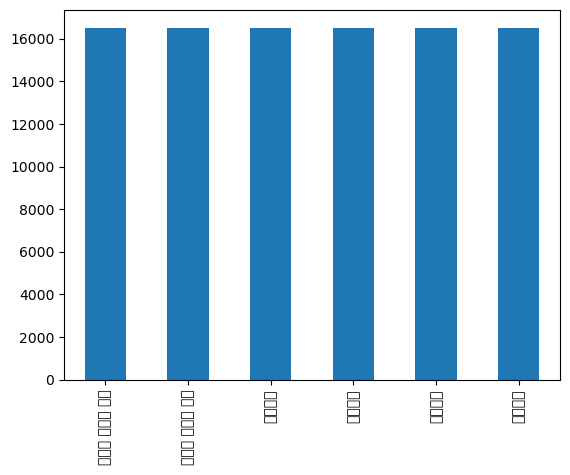

In [26]:
print(yBalanced.value_counts())
yBalanced.value_counts().plot(kind="bar")

In [27]:
yBalanced.shape

(99174,)

# Confusion Matrix Function

In [29]:
# Function to plot the confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    plt.figure(figsize=(20, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
         'Confusion matrix, without normalization'

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.rc('font', family='Lohit Devanagari')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# Applying Gaussian Naive Bayes Algorithms

In [30]:
uni=data.category.unique()

In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xBalanced, yBalanced)
model_predictions = model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, model_predictions)*100,2)))
print(classification_report(y_test, model_predictions,target_names=uni))

Accuracy: 69.46%
              precision    recall  f1-score   support

        ስፖርት       0.80      0.57      0.67      4136
  ሀገር አቀፍ ዜና       0.32      0.76      0.45       148
        ፖለቲካ       0.98      0.93      0.95      2125
        ቢዝነስ       0.44      0.67      0.53       770
  ዓለም አቀፍ ዜና       0.66      0.71      0.69      1260
        መዝናኛ       0.53      0.69      0.60      1830

    accuracy                           0.69     10269
   macro avg       0.62      0.72      0.65     10269
weighted avg       0.74      0.69      0.70     10269



findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

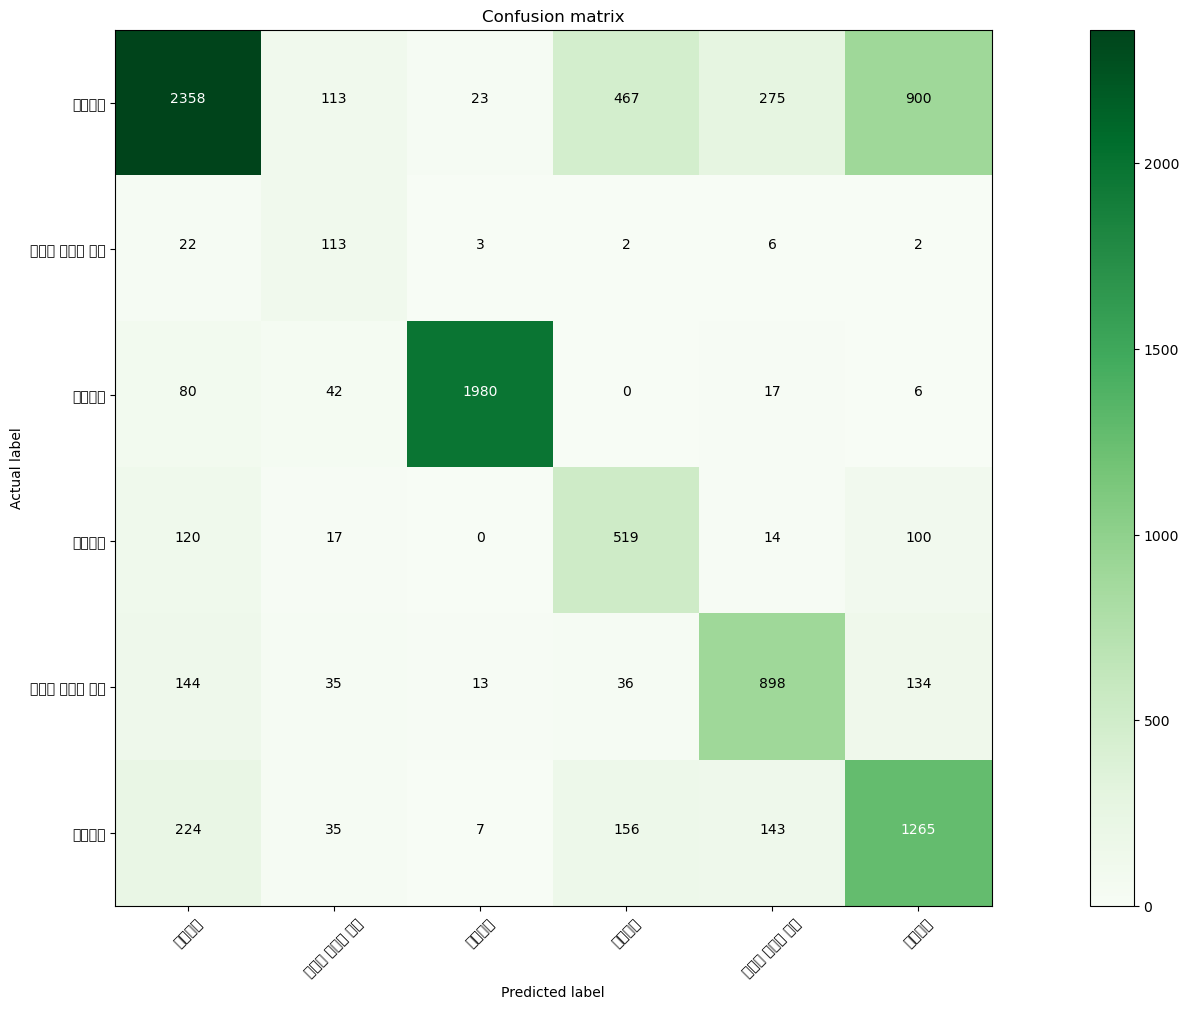

In [32]:
# used to measure the performance of a classifier in depth(i.e Gaussian Naive Bayes). 
cm = metrics.confusion_matrix(y_test, model_predictions)
plot_confusion_matrix(cm, classes=uni)

In [ ]:
#data1 = ['ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉባዔ ባለፈው እሁድ በሐዋሳ ከተማ ሲያካሂድ የተለያዩ ውሳኔዎች ተላልፈዋል፡፡ ባለፉት አራት ዓመታት ሲያገለግል ቆይቶ ዘንድሮ ይጠናቀቅ የነበረው የኮሚቴው የስራ አስፈፃሚና የፕሬዚዳንት የስልጣን ዘመን በመጪው ክረምት እስከሚካሄደው የቶኪዮ 2020 ኦሊምፒክ ማግስት ድረስ እንዲቀጥል ጉባዔው ወስኗል፡፡ የቶኪዮ 2020 ኦሊምፒክ ባለፈው ዓመት ሊካሄድ የነበረ ቢሆንም በኮቪድ-19 ወረርሽኝ ምክንያት ለአስራ ስድስት ወራት ተራዝሞ በመጪው ክረምት ሊካሄድ ቀን ተቆርጦለታል፡፡ ኮሚቴውን ሲመራ የነበረው ሥራ አስፈፃሚ በኦሊምፒኩ የተሻለ ውጤት ለማስመዝገብ የተለያዩ ዝግጅቶችን ሲያደርግ የቆየ ሲሆን ዘንድሮ የስራ ዘመኑን አጠናቆ በጠቅላላ ጉባዔ ምርጫ ይካሄድ ነበር፡፡ ይሁን እንጂ ኦሊምፒኩ በመራዘሙ ሲዘጋጅ የቆየው ስራ አስፈፃሚ የልፋቱን ውጤት እንዲመለከት እስከ ኦሊምፒኩ ማግስት እንዲቀጥል ጠቅላላ ጉባዔው ውሳኔ አስተላልፏል፡፡ ጉባዔውን በንግግር የከፈቱት የኢትዮጵያ ኦሊምፒክ ኮሚቴ ፕሬዚዳንት ዶክተር አሸብር ወልደጊዮርጊስ፣ ኢትዮጵያ የአኖካን ጉባኤ ባስተናገደችበት ማግስት አስረኛ ክልል ሆኖ እንደ አዲስ በተዋቀረው የሲዳማ ክልል ጉባዔው መካሄዱ ልዩ እንደሚያደርገው ገልፀዋል፡፡ ኢትዮጵያ ለመጀመሪያ ግዜ የአፍሪካ ወጣቶች ኦሊምፒክን በ2022 ለማስተናገድ እድል ባገኘችበት ማግስት በሲዳማ ክልል ዘንድሮ የኢትዮጵያ ወጣቶች ኦሊምፒክ ጨዋታ እንደሚካሄድም ጠቁመዋል፡፡ ኮሚቴው በቶኪዮ 2020 ኦሊምፒክ የአበበ ቢቂላን የ1964 የቶኪዮ ኦሊምፒክ ገድል ለመድገም በምትዘጋጅበት ወቅት ጉባዔውን ማካሄዱና በኮቪድ-19 ስጋት ውስጥ ሆኖ መከናወኑ ጉባዔውን የተለየ እንደሚያደርገውም ተናግረዋል፡፡ የባህልና ቱሪዝም ሚኒስትር ዶክተር ሂሩት ካሳው፣ ስፖርት የማህበራዊና ተፈጥሯዊ ሳይንስ ዘውግ መሆኑን ጠቅሰው ማህበራዊ ትስስርን በእጅጉ የሚፈጥር በመሆኑ ህብረተሰቡ ስፖርትን ባህሉ እንዲያደርግ የተጀመሩ እንቅስቃሴዎች ተጠናክረው መቀጠል እንዳለባቸው መልዕክት አስተላልፈዋል። እስካሁን ድረስ በስፖርት ዘርፍ የተፈጠረው ተወዳዳሪነት ዝቅተኛ መሆኑን በመጥቀስም በአትሌትክስ ስፖርት ኢትዮጵያ ያስመዘገበችው ውጤት በሌሎችም እንዲደገም መሠራት እንዳለበት አብራርተዋል። ሚኒስትሯ የህብረተሰብ ስፖርትንም ለማስፋፋት በትምህርት ቤትና በስራ ቦታ የአካል ብቃት እንቅስቃሴ ላይ ትኩረት ተሰጥቶ መሠራት እንዳለበት ገልፀዋል። የኢፌዲሪ ስፖርት ኮሚሽን ኮሚሸነር ኤሊያስ ሽኩር በበኩላቸው፣ 45ኛው የኢትዮጵያ ኦሊምፒክ ኮሚቴ መደበኛ ጠቅላላ ጉባኤ የተካሄደው በስፖርት ህብረተሰቡ ዘንድ መነቃቃት በተፈጠረበት ወቅትና በብሔራዊ የስፖርት ምክር ቤት መደበኛ አንደኛ ስብሰባ ትላልቅ ውሳኔዎች በተላለፈበት ወቅት መሆኑን አስታውሰዋል፡፡ የአኖካ ጉባኤ በተሳካ ሁኔታ የተካሄደ መሆኑን ጠቅሰውም ሠላማዊና አስተማማኝ ሁኔታ በኢትዮጵያ መኖሩን አኖካ በማረጋገጡ ቀጣይ ስብሰባዎችን በራሱ ሙሉ ወጪ በኢትዮጵያ ለማካሄድ መነሳሳት እንዳሳየ አብራርተዋል። ለቶኪዮ 2020 የተሻለ ውጤት ለማስመዝገብ ዝግጅት ማድረግ በተጀመረበት ወቅት ላይ ጉባዔው በስፖርት ምክር ቤት በተቀመጡ ወሳኔዎችና አቅጣጫዎች መሠረት በጥልቀት መምከር እንዳለበት አስረድተዋል፡፡ ስፖርት ለሠላም፣ ለወዳጅነት፣ ለአንድነት፣ለወንድማማችነትና ለብልፅግና መሆኑን በመገንዘብ ጠቃሚ ውይይት እንዲደረግ አሳስበዋል፡፡ የሲዳማሁን የደቡብ ብሔራዊ ክልላዊ መንግስት ምክትል ፕሬዚዳንት በመሆን እያገለገሉ የሚገኙት አቶ ተስፋየ ይገዙ፣ የቀድሞ የኢፌዴሪ ምክትል ስፖርት ኮሚሽነርና አሁን የኦሮሚያ ክልላዊ መንግስት የኮሙኒኬሽን ቢሮ ኃላፊ የሆኑት አቶ ጌታቸው ባልቻ የእውቅና ሽልማት ከተበረከተላቸው መካከል ዋነኞቹ ናቸው። ጠቅላላ ጉባዔው የ44ኛው መደበኛ ጉባኤ ቃለ ጉባኤ ፣ የ2012 ዓ.ም ዕቅድ አፈፃፀም ሪፖርትና የውጪ ኦዲተር ሪፖርት መርምሮ ያፀደቀ ሲሆን የ2013 ዓ.ም ዕቅድና የኢትዮጵያ ኦሊምፒክ ኮሚቴ ቀጣይ 46ኛ መደበኛ ጠቅላላ ጉባዔን በተመለከተ መክሮ ውሳኔ አስተላልፏል።አዲስ ዘመን ታህሳስ 28/2013']
#model_predictions = model.predict(data1)
#model_predictions['category']

# Applying Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(xBalanced, yBalanced)
model_pred = model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, model_pred)*100,2)))
print(classification_report(y_test, model_pred ,target_names=uni))

Accuracy: 80.24%
              precision    recall  f1-score   support

        ስፖርት       0.82      0.80      0.81      4136
  ሀገር አቀፍ ዜና       0.66      0.68      0.67       148
        ፖለቲካ       0.95      0.97      0.96      2125
        ቢዝነስ       0.65      0.58      0.61       770
  ዓለም አቀፍ ዜና       0.78      0.84      0.81      1260
        መዝናኛ       0.69      0.70      0.69      1830

    accuracy                           0.80     10269
   macro avg       0.76      0.76      0.76     10269
weighted avg       0.80      0.80      0.80     10269



findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

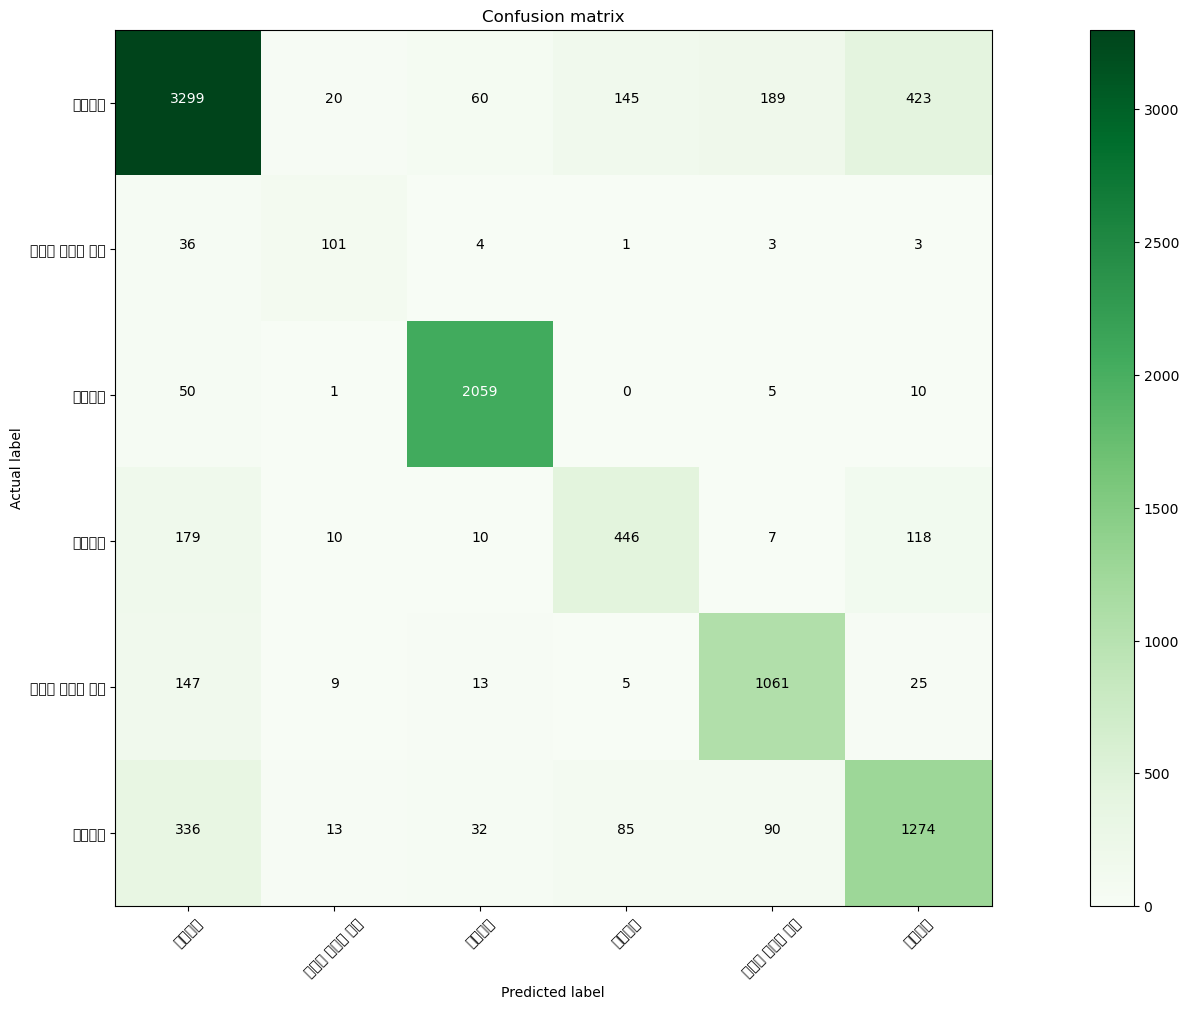

In [34]:
# used to measure the performance of a classifier in depth(i.e Random Forest). 
cm = metrics.confusion_matrix(y_test, model_pred)
plot_confusion_matrix(cm, classes=uni)

# Applying Logistic Regression Classifier

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xBalanced, yBalanced)
model_pred1 = model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, model_pred1)*100,2)))
print(classification_report(y_test, model_pred1 ,target_names=uni))

Accuracy: 77.55%
              precision    recall  f1-score   support

        ስፖርት       0.85      0.71      0.77      4136
  ሀገር አቀፍ ዜና       0.57      0.88      0.69       148
        ፖለቲካ       0.97      0.96      0.97      2125
        ቢዝነስ       0.52      0.73      0.61       770
  ዓለም አቀፍ ዜና       0.72      0.82      0.76      1260
        መዝናኛ       0.64      0.70      0.67      1830

    accuracy                           0.78     10269
   macro avg       0.71      0.80      0.75     10269
weighted avg       0.79      0.78      0.78     10269



findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

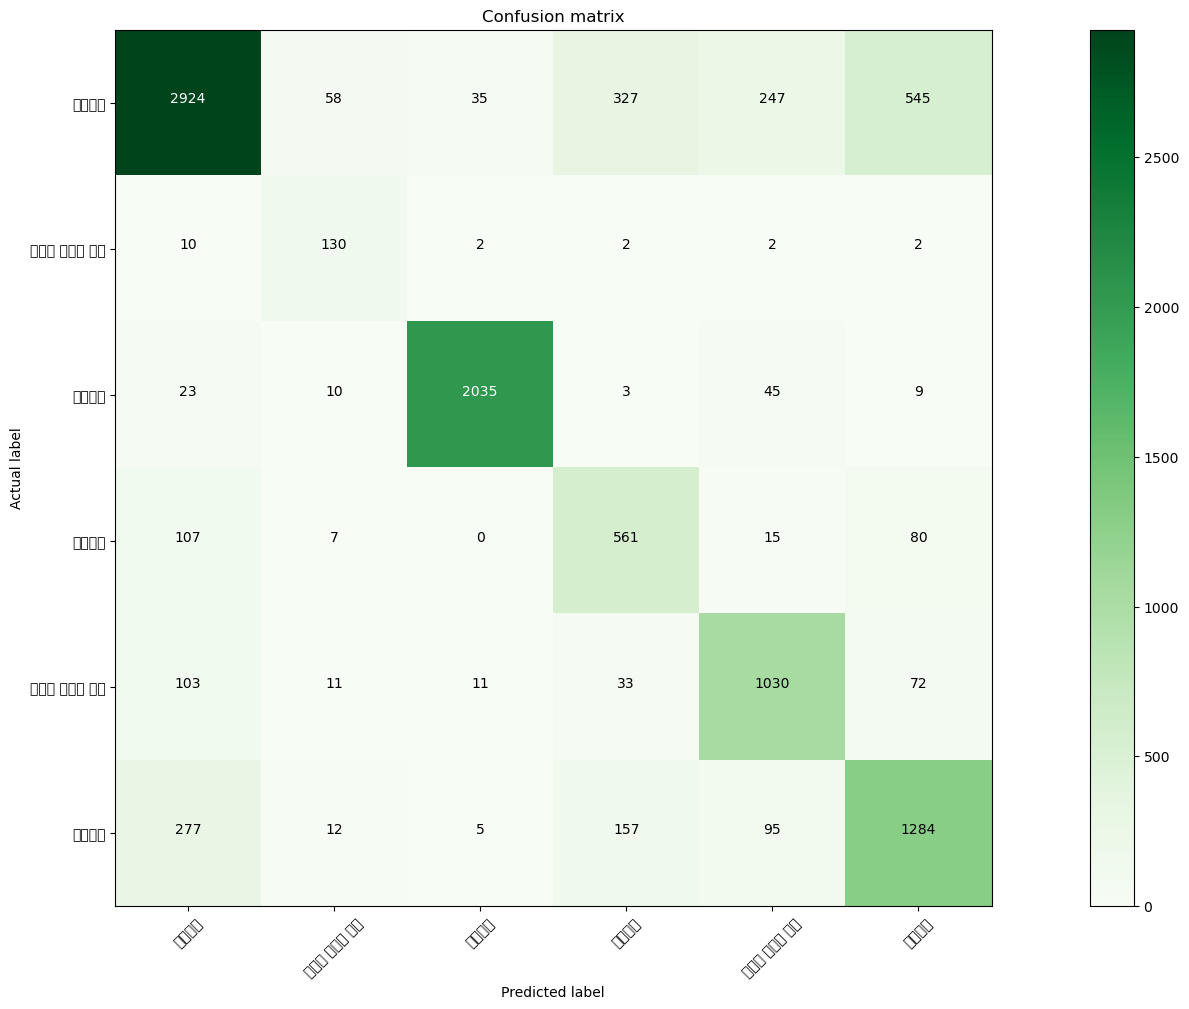

In [36]:
# used to measure the performance of a classifier in depth(i.e Logistic Regression). 
cm = metrics.confusion_matrix(y_test, model_pred1)
plot_confusion_matrix(cm, classes=uni)

# Applying k-nearest neighbors Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xBalanced, yBalanced)
model_pred2 = model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, model_pred2)*100,2)))
print(classification_report(y_test, model_pred2,target_names=uni))

Accuracy: 52.49%
              precision    recall  f1-score   support

        ስፖርት       0.92      0.10      0.18      4136
  ሀገር አቀፍ ዜና       0.48      0.64      0.55       148
        ፖለቲካ       0.91      0.96      0.94      2125
        ቢዝነስ       0.24      0.86      0.37       770
  ዓለም አቀፍ ዜና       0.49      0.80      0.61      1260
        መዝናኛ       0.45      0.63      0.53      1830

    accuracy                           0.52     10269
   macro avg       0.58      0.67      0.53     10269
weighted avg       0.72      0.52      0.47     10269



findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

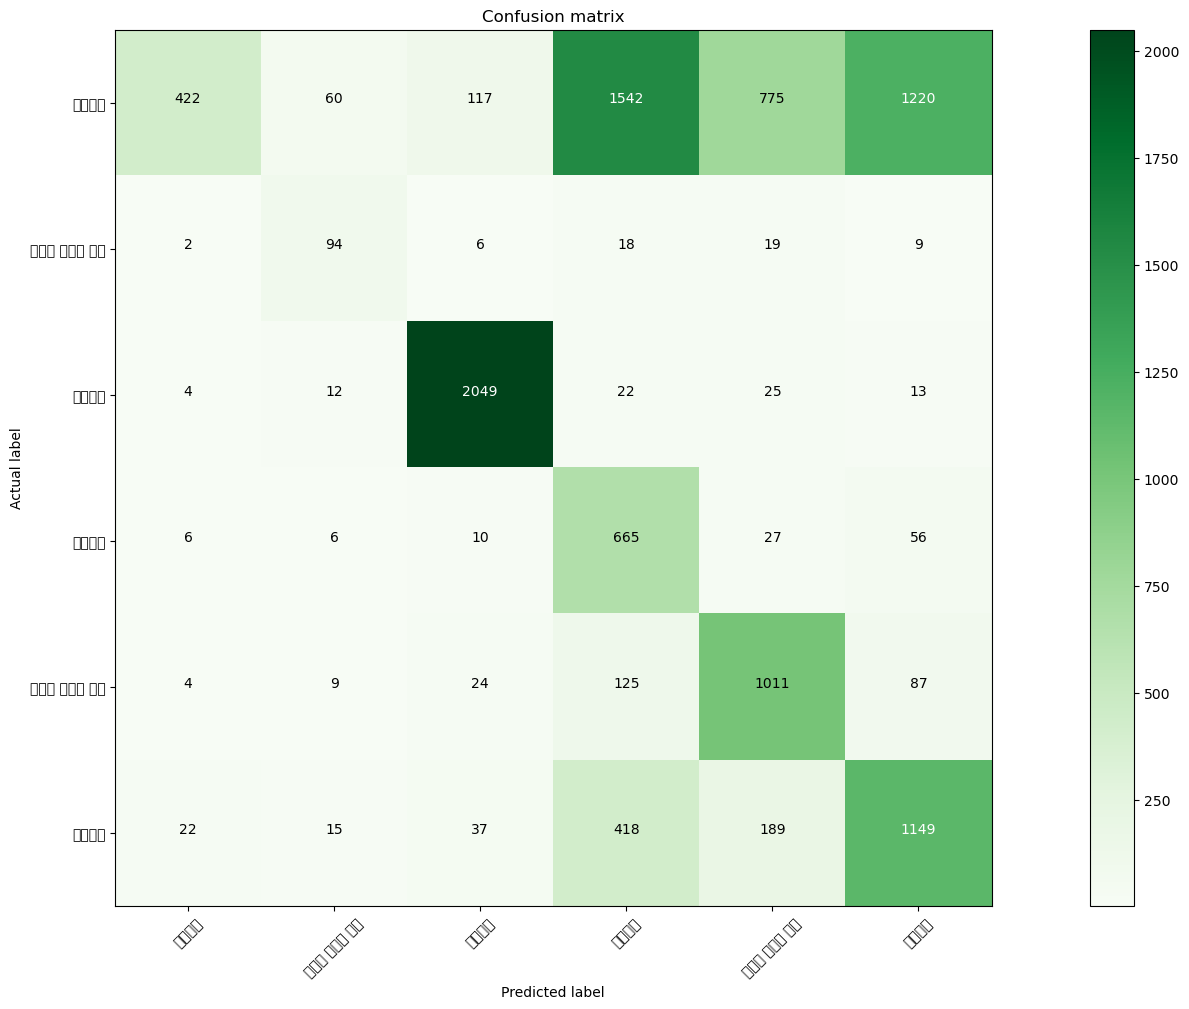

In [38]:
# used to measure the performance of a classifier in depth(i.e k-nearest neighbor). 
cm = metrics.confusion_matrix(y_test, model_pred2)
plot_confusion_matrix(cm, classes=uni)

# Applying Decission Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)
model.fit(xBalanced, yBalanced)
model_pred3 = model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, model_pred3)*100,2)))
print(classification_report(y_test, model_pred3,target_names=uni))

Accuracy: 66.85%
              precision    recall  f1-score   support

        ስፖርት       0.71      0.66      0.69      4136
  ሀገር አቀፍ ዜና       0.53      0.55      0.54       148
        ፖለቲካ       0.90      0.91      0.91      2125
        ቢዝነስ       0.38      0.43      0.40       770
  ዓለም አቀፍ ዜና       0.62      0.67      0.64      1260
        መዝናኛ       0.50      0.51      0.51      1830

    accuracy                           0.67     10269
   macro avg       0.61      0.62      0.61     10269
weighted avg       0.67      0.67      0.67     10269



findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

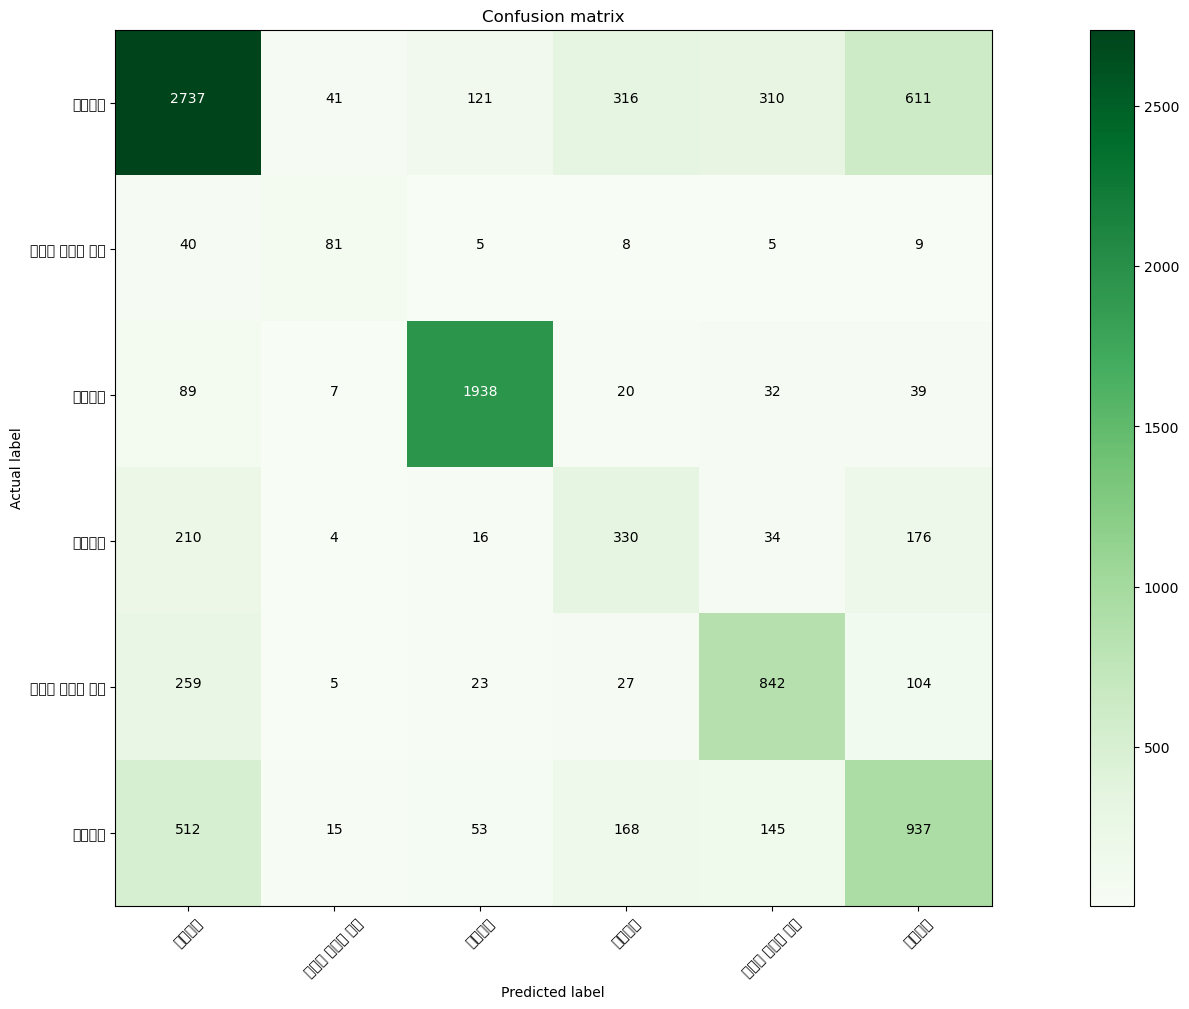

In [40]:
#used to measure the performance of a classifier in depth(i.e Decision Tree). 
cm = metrics.confusion_matrix(y_test, model_pred3)
plot_confusion_matrix(cm, classes=uni)

# Applying Support Vector Machine Classifier

In [41]:
from sklearn import model_selection, svm
SVM = svm.SVC(kernel='linear')
SVM.fit(xBalanced,yBalanced)
model_pred4 = SVM.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, model_pred4)*100,2)))
print(classification_report(y_test, model_pred4,target_names=uni))

Accuracy: 78.4%
              precision    recall  f1-score   support

        ስፖርት       0.85      0.72      0.78      4136
  ሀገር አቀፍ ዜና       0.64      0.79      0.71       148
        ፖለቲካ       0.98      0.97      0.97      2125
        ቢዝነስ       0.52      0.72      0.61       770
  ዓለም አቀፍ ዜና       0.73      0.83      0.78      1260
        መዝናኛ       0.66      0.72      0.69      1830

    accuracy                           0.78     10269
   macro avg       0.73      0.79      0.75     10269
weighted avg       0.80      0.78      0.79     10269



findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

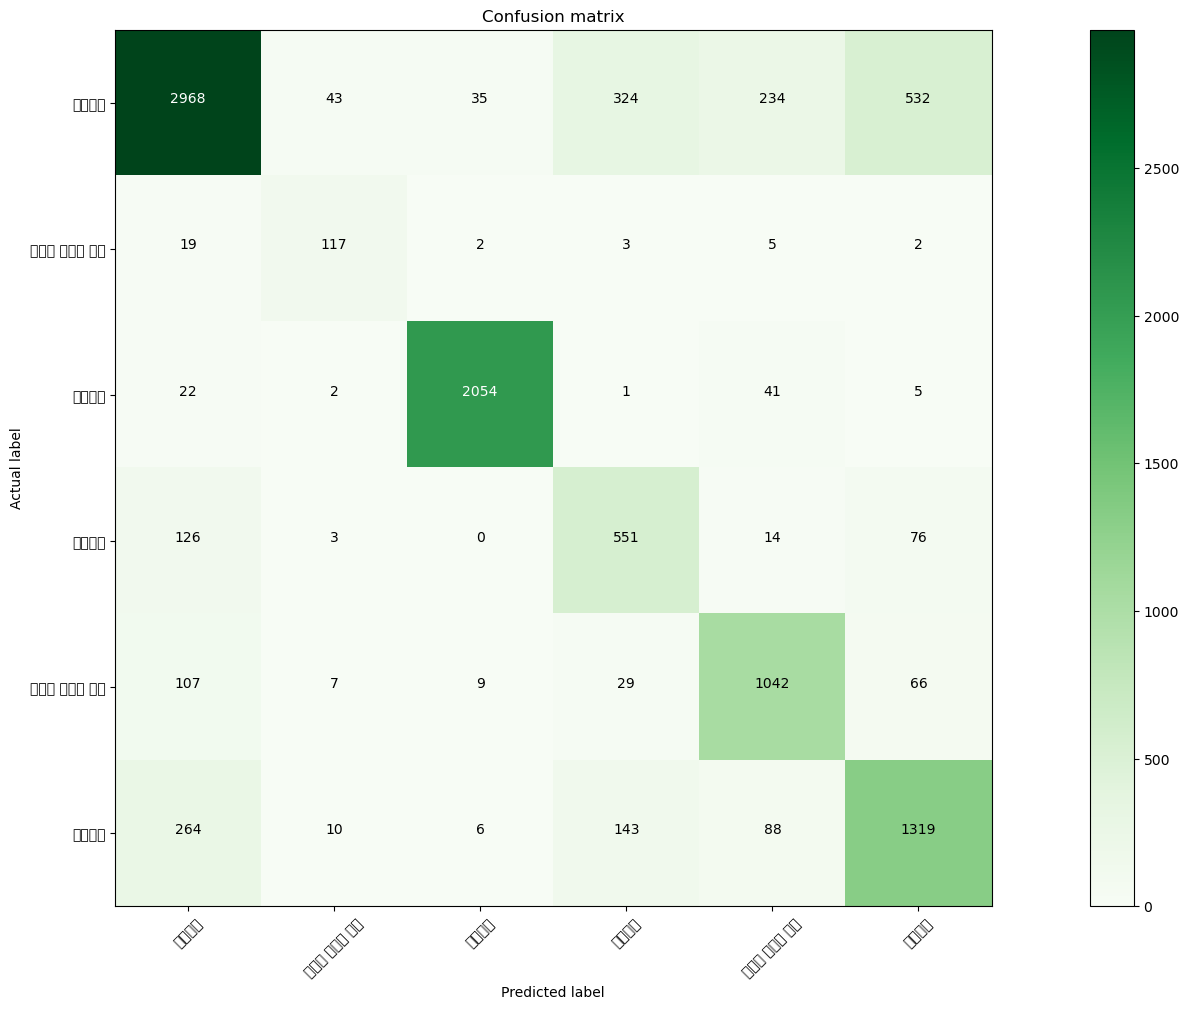

In [42]:
# used to measure the performance of a classifier in depth(i.e Support Vector Machine).
cm = metrics.confusion_matrix(y_test, model_pred4)
plot_confusion_matrix(cm, classes=uni)